In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-02-20 19:49:46--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.04s   

2023-02-20 19:49:46 (1.13 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [47]:
# split data into x (features) and y (labels)
x = dataset.copy()
y = x.pop('expenses')

# Split into train and test sets
train_dataset_raw, test_dataset_raw, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

# check the lengths
len(train_dataset), len(test_dataset)

(1070, 268)

In [48]:
# Create a column transformer
ct = make_column_transformer(
    # normalize all numerical columns to values between 0 and 1
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    # one-hot encode the categorical columns
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# fit the column transformer on the training data
ct.fit(train_dataset_raw)

# Transform the training and test data
train_dataset = ct.transform(train_dataset_raw)
test_dataset = ct.transform(test_dataset_raw)

In [49]:
# Set up EarlyStopping to stop training when loss stops improving
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Build a neural network
model = keras.models.Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# Train the model
history = model.fit(train_dataset, train_labels, epochs=1000, callbacks=[callback])

Epoch 1/1000
34/34 [==============================] - 0s 736us/step - loss: 13342.9629 - mae: 13342.9629 - mse: 322366144.0000
Epoch 2/1000
34/34 [==============================] - 0s 785us/step - loss: 13331.1279 - mae: 13331.1279 - mse: 322049088.0000
Epoch 3/1000
34/34 [==============================] - 0s 855us/step - loss: 13302.6641 - mae: 13302.6641 - mse: 321287040.0000
Epoch 4/1000
34/34 [==============================] - 0s 791us/step - loss: 13246.1338 - mae: 13246.1338 - mse: 319743456.0000
Epoch 5/1000
34/34 [==============================] - 0s 760us/step - loss: 13150.3906 - mae: 13150.3906 - mse: 317151584.0000
Epoch 6/1000
34/34 [==============================] - 0s 772us/step - loss: 13004.7939 - mae: 13004.7939 - mse: 313286272.0000
Epoch 7/1000
34/34 [==============================] - 0s 715us/step - loss: 12798.5820 - mae: 12798.5820 - mse: 307865152.0000
Epoch 8/1000
34/34 [==============================] - 0s 773us/step - loss: 12521.9512 - mae: 12521.9512 - mse:

34/34 [==============================] - 0s 706us/step - loss: 4313.0967 - mae: 4313.0967 - mse: 64279692.0000
Epoch 67/1000
34/34 [==============================] - 0s 707us/step - loss: 4208.4746 - mae: 4208.4746 - mse: 62779236.0000
Epoch 68/1000
34/34 [==============================] - 0s 700us/step - loss: 4109.6875 - mae: 4109.6875 - mse: 60662396.0000
Epoch 69/1000
34/34 [==============================] - 0s 713us/step - loss: 4020.5630 - mae: 4020.5630 - mse: 59413548.0000
Epoch 70/1000
34/34 [==============================] - 0s 727us/step - loss: 3943.9048 - mae: 3943.9048 - mse: 57935404.0000
Epoch 71/1000
34/34 [==============================] - 0s 688us/step - loss: 3875.9221 - mae: 3875.9221 - mse: 56552372.0000
Epoch 72/1000
34/34 [==============================] - 0s 729us/step - loss: 3823.0933 - mae: 3823.0933 - mse: 55402748.0000
Epoch 73/1000
34/34 [==============================] - 0s 690us/step - loss: 3779.1641 - mae: 3779.1641 - mse: 54346012.0000
Epoch 74/1000


34/34 [==============================] - 0s 707us/step - loss: 3571.0322 - mae: 3571.0322 - mse: 42017316.0000
Epoch 132/1000
34/34 [==============================] - 0s 714us/step - loss: 3567.9832 - mae: 3567.9832 - mse: 41786252.0000
Epoch 133/1000
34/34 [==============================] - 0s 702us/step - loss: 3565.7368 - mae: 3565.7368 - mse: 41850300.0000
Epoch 134/1000
34/34 [==============================] - 0s 724us/step - loss: 3564.9756 - mae: 3564.9756 - mse: 41796520.0000
Epoch 135/1000
34/34 [==============================] - 0s 730us/step - loss: 3564.0005 - mae: 3564.0005 - mse: 41927016.0000
Epoch 136/1000
34/34 [==============================] - 0s 720us/step - loss: 3560.3357 - mae: 3560.3357 - mse: 41853416.0000
Epoch 137/1000
34/34 [==============================] - 0s 710us/step - loss: 3558.1980 - mae: 3558.1980 - mse: 41848460.0000
Epoch 138/1000
34/34 [==============================] - 0s 715us/step - loss: 3556.7080 - mae: 3556.7080 - mse: 41746812.0000
Epoch 1

34/34 [==============================] - 0s 739us/step - loss: 3478.0198 - mae: 3478.0198 - mse: 48222220.0000
Epoch 197/1000
34/34 [==============================] - 0s 716us/step - loss: 3476.9812 - mae: 3476.9812 - mse: 48338136.0000
Epoch 198/1000
34/34 [==============================] - 0s 746us/step - loss: 3475.1936 - mae: 3475.1936 - mse: 48562360.0000
Epoch 199/1000
34/34 [==============================] - 0s 747us/step - loss: 3477.2502 - mae: 3477.2502 - mse: 48899996.0000
Epoch 200/1000
34/34 [==============================] - 0s 728us/step - loss: 3474.6462 - mae: 3474.6462 - mse: 48932608.0000
Epoch 201/1000
34/34 [==============================] - 0s 691us/step - loss: 3475.0452 - mae: 3475.0452 - mse: 49228904.0000
Epoch 202/1000
34/34 [==============================] - 0s 676us/step - loss: 3477.6714 - mae: 3477.6714 - mse: 49131460.0000
Epoch 203/1000
34/34 [==============================] - 0s 689us/step - loss: 3474.8159 - mae: 3474.8159 - mse: 49082088.0000
Epoch 2

9/9 - 0s - loss: 3165.3916 - mae: 3165.3916 - mse: 43361612.0000 - 72ms/epoch - 8ms/step
Testing set Mean Abs Error: 3165.39 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 661us/step


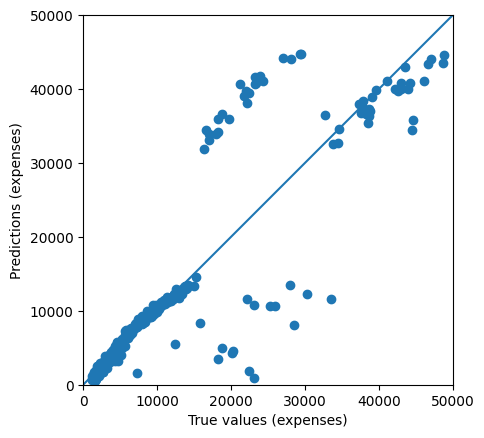

In [50]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
